In [285]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [286]:
def compute_result(model,data,text):
    y_pred = model.fit_predict(data)
    plt.subplot(223)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)
    plt.title(text)
    print("silhouette_score: ",metrics.silhouette_score(data, y_pred))
    print("davies_bouldin_score: ",metrics.davies_bouldin_score(data, y_pred))

In [288]:
df = pd.read_csv("Live.csv")

In [289]:
df = pd.concat([df, pd.get_dummies(df['status_type'])], axis=1)
df_cleaned = df.drop(['status_type','status_published','status_id'],axis=1)
df_cleaned.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0


In [290]:
mms = MinMaxScaler()
mms.fit(df_cleaned)
data_transformed = mms.transform(df_cleaned)
Train,Test = train_test_split(data_transformed)

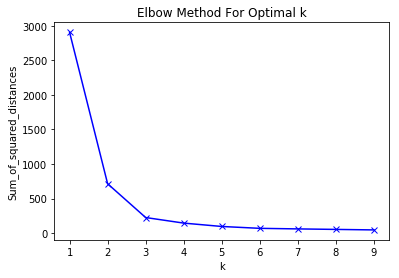

In [291]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Train)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

silhouette_score:  0.896520693409557
davies_bouldin_score:  0.3856294319748641


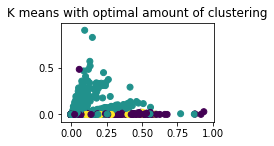

In [292]:
compute_result(KMeans(n_clusters=3),Train,"K means with optimal amount of clustering")

silhouette_score:  0.9098294417159143
davies_bouldin_score:  0.20965282113741174


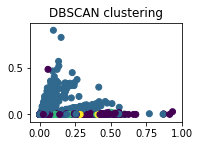

In [293]:
compute_result(DBSCAN(eps=1, min_samples=3),Train,"DBSCAN clustering")

silhouette_score:  0.896520693409557
davies_bouldin_score:  0.3856294319748641


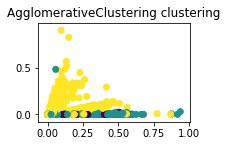

In [294]:
compute_result(AgglomerativeClustering(n_clusters=3, linkage='ward'),Train,"AgglomerativeClustering clustering")
